# Understanding turbulence with pyvista:

Turbulence is a chaotic flow regime that arises as a result of non-linearity in the evolution of fluids (gases and liquids), which lead to drastic changes in pressure, density, and velocity.

Turbulence is readily triggered in fluids that have small viscosity, which can translate into large flow Reynolds numbers. Turbulence is ubiquitous in the Universe, yet it is still not well understood.

## Cascade of turbulence:

Turbulence is generally studied in terms of the energy cascade that it produces. A turbulence cascade tells us how energy is transferred between all the different scales of the flow.

Turbulent eddies are produced as a result of flow motions occurring at all these scales. Large eddies have the largest amount of kinetic energy while small eddies have smaller amounts.

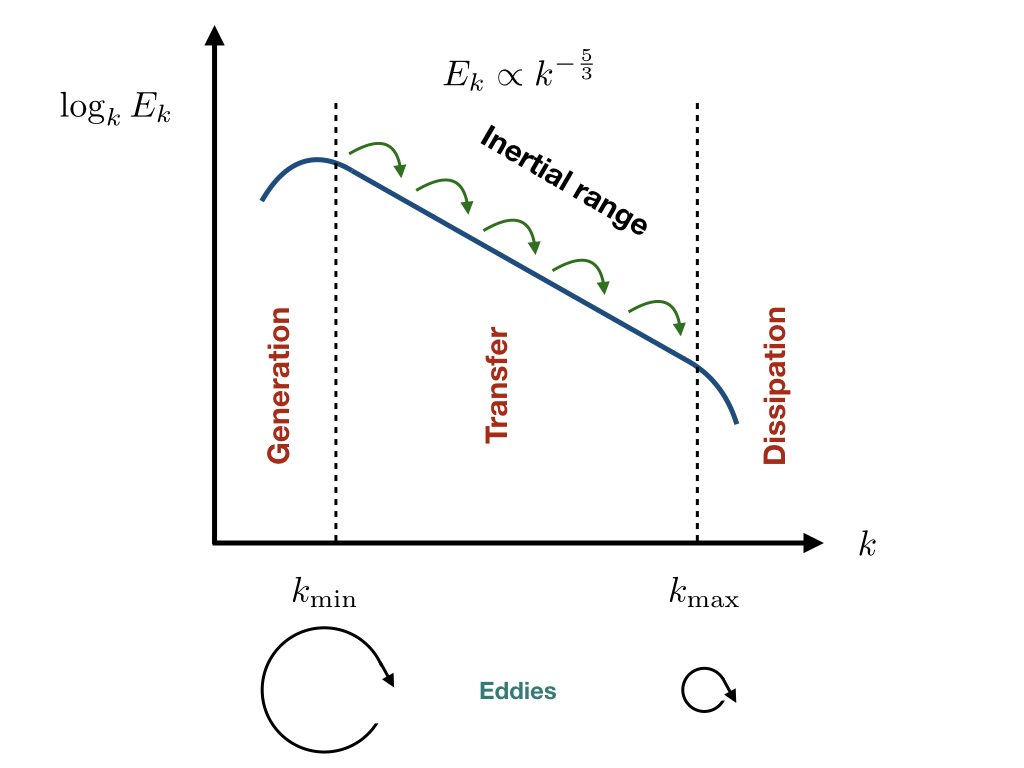

Turbulence can therefore be understood as a collection of perturbations occurring in a flow at several length scales with wavelengths $\lambda_i$. The wavenumbers associated with these perturbations/waves are:

$$k_i=\frac{2\,\pi}{\lambda_i}$$

The first description of turbulence was devised by Kolmorov, back in 1941. Kolmogorov postulated that the flow kinetic energy would follow a cascade with three main ranges:

- **An energy generation range.** Here the turbulent flow behaviour and its scales depend on its kinetic energy and dissipation rate, $\epsilon$.


- **An energy transfer range**, which is also known as the inertial range and follows a power-law in wavenumber space. Energy is tranferred from large scales to small scales. Here, the behaviour of the turbulent flow depends on the eddy size and the dissipation rate.

$$E_k\propto k^{-\frac{5}{3}}$$


- **An energy dissipation range.** Here the behaviour depends on the viscosity of the flow and the dissipation rate.

Kolmogorov's result is however only valid for **incompressible** flows. When compressibility is taken into account, other power-law slopes can be found. For example, in **compressible** turbulence, which is dominated by shocks, Burgers' turbulence is more relevant. In that case:

$$E_k\propto k^{-2}$$

### Exercise: plotting energy cascades:

- Kolmogorov turbulence

- Burgers turbulence

In [8]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define indices
index1= 5./3. #Kolmogorov
index2= 2. #Burgers

# X axis for the wavelengths:
lambdas = np.arange(1,1001)

# X axis for the wavenumbers:
wavenumbers = 2*np.pi/lambdas

# Get Y axis energies, normalisation parameter set to 1 for simplicity
energ_kolm = wavenumbers**(-index1)
energ_burg = wavenumbers**(-index2)


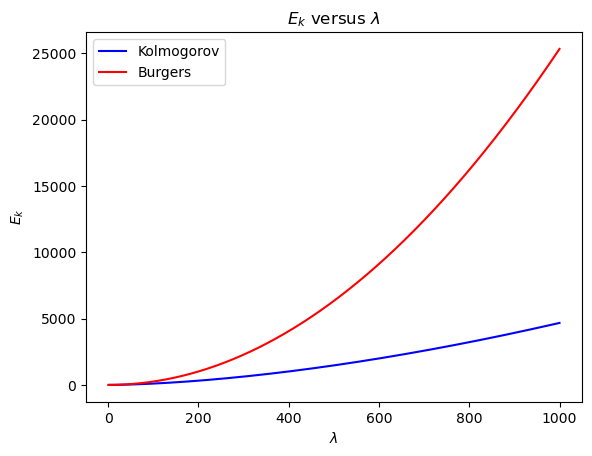

In [10]:
# Make plot
fig, ax = plt.subplots(1,1)
ax.plot(lambdas, energ_kolm, c='blue', label = "Kolmogorov")
ax.plot(lambdas, energ_burg, c='red', label = "Burgers")

ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$E_k$')

plt.legend()
plt.show()

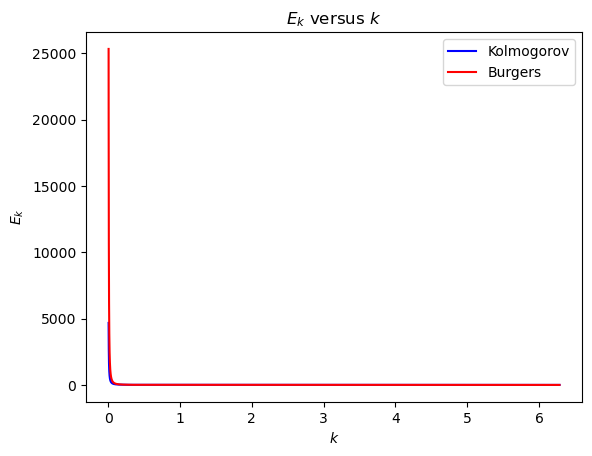

In [4]:
fig,ax=plt.subplots(1,1)

ax.plot(wavenumbers, energ_kolm, c='blue', label = "Kolmogorov")
ax.plot(wavenumbers, energ_burg, c='red', label = "Burgers")

ax.set_title(r'$E_k$ versus $k$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$E_k$')

plt.legend()
plt.show()

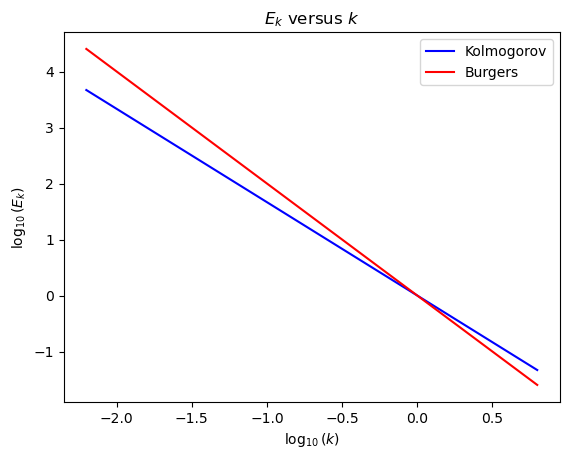

In [7]:
fig,ax=plt.subplots(1,1)

ax.plot(np.log10(wavenumbers), np.log10(energ_kolm), c='blue', label = "Kolmogorov")
ax.plot(np.log10(wavenumbers), np.log10(energ_burg), c='red', label = "Burgers")

ax.set_title(r'$E_k$ versus $k$')
ax.set_xlabel(r'$\log_{10}(k)$')
ax.set_ylabel(r'$\log_{10}(E_k)$')
plt.legend()
plt.show()

## The Reynolds number:

Given a gas with density, $\rho$, kinematic viscosity, $\nu$, and dynamic viscosity $\mu=\rho\,\nu$, moving at a speed, $v$, the Reynolds numbers is:

$$R_{\rm e} = \frac{v\,l}{\nu} = \frac{\rho\,v\,l}{\mu}$$

where $l$ is a characteristic length of the flow.


We can see that $R_e$ depends linearly on $v$, which implies that the Reynolds number becomes larger as the flow velocity increases. This means flows can transition from laminar (low Reynolds numbers) to turbulent (high Reynolds numbers), when the speed increases.

Canonically the flow transition from laminar to turbulent occurs at $R_{\rm e}\sim 10^3$.

### An example:

Let us calculate the Reynolds number of the flow generated by a fish swimming in the ocean. The fish can reach speeds of the order of:

$$v = 100\,\rm km\,h^{-1}=27.78\,\rm m\,s^{-1}$$

The dynamic viscosity of sea water is: 

$$\mu=0.00122\,\rm N\,m^{-2}\,s$$

The fish height is about:

$$l=1\,\rm m$$

And, the water density at $15\,\rm C$ is:

$$\rho=1026\,\rm kg\,m^{-3}$$

In [12]:
# Define Re function

def Re_number(rho, vel, length, mu):
    """
    This is a function to calculate Reynolds numbers:
    Input: rho, vel, length, mu
    Output: R_e
    """
    return (rho*vel*length)/(mu)


In [13]:
# All quantities in SI units.

mu = 0.00122
le = 1
rho = 1026
vel = 27.78

# Call our function:
Re = Re_number(rho,vel,le,mu)

print('The Reynolds number is', "{:0.5e}".format(Re))

The Reynolds number is 2.33625e+07


## Turbulence Mach number:

Within a turbulent gas, the velocity field is therefore non-uniform and vary spatially and with time. Therefore, it is common to study it using the root mean square (rms) turbulence Mach number:

$$M_{\rm turb} = \frac{v_{\rm rms}}{c_{\rm sound}},$$

where $v_{\rm rms}=\overline{v^2}$, and $c_{\rm sound}$ is the sound speed of tha gas.

## Eddy turnover time:

The eddy turnover time is a characteristic time-scale of turbulence. For a single eddy, it can be calculated from its size and speed as follows:

$$t_{\rm eddy} = \frac{\lambda}{v_{\rm eddy}},$$

but flows normally have many eddies, so it is more appropriate to calculate it from the rms speed:

$$t_{\rm eddy} = \frac{\lambda}{v_{\rm rms}} = \frac{\lambda}{M_{\rm turb}\,c_{\rm sound}},$$

where $\lambda$ depends on the length scale of the system. For instance, for a box with length $L$, the largest eddies would have sizes $\lambda=\frac{L}{2}$.

# Turbulence-in-a-box simulation:

Low-resolution simulation (recommended):

https://www.dropbox.com/scl/fo/aip4lo4983phsyd5tcn77/ALvNSCjfQpzlbjrKmhP5Ex8?rlkey=m4ragdal7lagwczhtkvyqj0ty&dl=0



In [14]:
# Import libraries
import pyvista as pv

In [18]:
# Open the file

input_directory = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Yachay_Tech/Semestre5_2024/backup-cp1/computational-physics-1/old-notes/unit-2/TURB_DRIVE_SUP/"
file_name = "data.0030.vtk"

# We collect the data into a mesh
mesh_turb = pv.read(input_directory+file_name)

### 1. Mesh properties:

In [19]:
print(mesh_turb)

RectilinearGrid (0x30562f760)
  N Cells:      2500
  N Points:     2601
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   51, 51, 1
  N Arrays:     5


In [20]:
print(mesh_turb.dimensions)

(51, 51, 1)


In [21]:
print(mesh_turb.n_cells)

2500


In [22]:
print(mesh_turb.n_points)

2601


In [23]:
print(mesh_turb.n_arrays)

5


In [24]:
print(mesh_turb.array_names)

['rho', 'vx1', 'vx2', 'Bx1', 'Bx2']


In [25]:
print(mesh_turb.bounds)

(-2.0, 2.0, -2.0, 2.0, 0.0, 0.0)


In [26]:
print(mesh_turb.bounds[2])

-2.0


In [27]:
print(mesh_turb.center)

[0.0, 0.0, 0.0]


In [28]:
print(mesh_turb.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32    (2500,)              SCALARS
    vx1                     float32    (2500,)
    vx2                     float32    (2500,)
    Bx1                     float32    (2500,)
    Bx2                     float32    (2500,)


### 2. Density plot:

In [29]:
# Density array
dens = pv.get_array(mesh_turb, "rho", preference = "cell")

# The array is flattened -> 1D
print(dens.shape)

# Reshape the array
dens_2d = dens.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)

print(dens_2d.shape)

(2500,)
(50, 50)


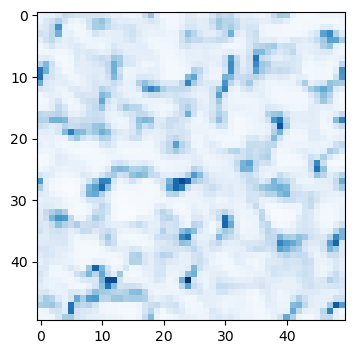

In [32]:
# Figure

plt.figure(figsize=(5,4))

plt.imshow(dens_2d, cmap = "Blues")

plt.show()

### 3. Create a meshgrid:

In [33]:
# Create coordinate vectors:
x = np.linspace(mesh_turb.bounds[0], mesh_turb.bounds[1],\
               mesh_turb.dimensions[1] - 1)
y = np.linspace(mesh_turb.bounds[2], mesh_turb.bounds[3],\
               mesh_turb.dimensions[0] - 1)

#print(x,y)
# Generate Grid
x_2d, y_2d = np.meshgrid(x, y)

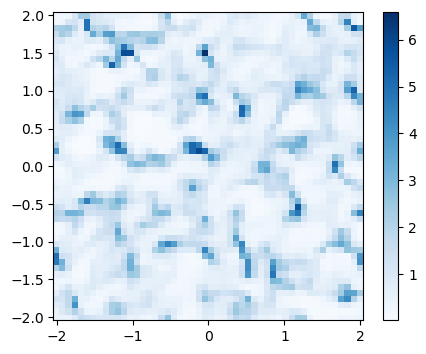

In [34]:
# Figure
plt.figure(figsize=(5,4))

z = plt.pcolor(x_2d, y_2d, dens_2d, cmap = "Blues")

plt.colorbar(z)

plt.show()

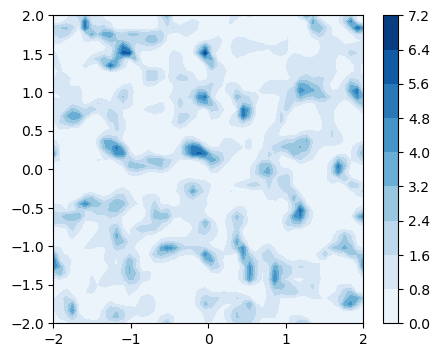

In [35]:
# Figure
plt.figure(figsize=(5,4))

z = plt.contourf(x_2d, y_2d, dens_2d, 8, cmap = "Blues")

plt.colorbar(z)

plt.show()

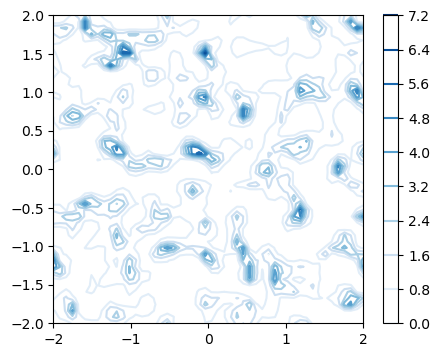

In [36]:
# Figure
plt.figure(figsize=(5,4))

Z = plt.contour(x_2d, y_2d, dens_2d, 8, cmap = "Blues")

plt.colorbar(Z)

plt.show()

#### 4. Vector plots (velocity):

In [37]:
# Density array
velx = pv.get_array(mesh_turb, "vx1", preference = "cell")
vely = pv.get_array(mesh_turb, "vx2", preference = "cell")

# The array is flattened -> 1D
print(velx.shape)
print(vely.shape)

# Reshape the array
velx_2d = velx.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)
vely_2d = vely.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)

print(velx_2d.shape, vely_2d.shape)

(2500,)
(2500,)
(50, 50) (50, 50)


In [38]:
# Calculate the modulus of the velocity

modulus_velocity = np.sqrt(velx_2d**2 + vely_2d**2)

print(np.min(modulus_velocity), np.max(modulus_velocity))

0.0072832615 4.8332434


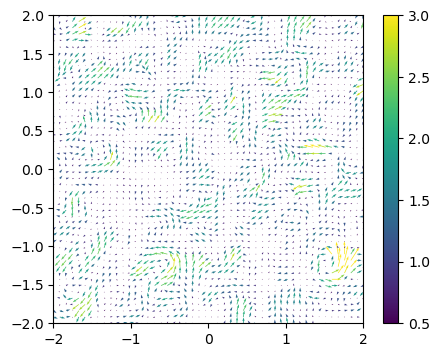

In [41]:
# Figure
plt.figure(figsize=(5,4))

z = plt.quiver(x_2d, y_2d, velx_2d, vely_2d, modulus_velocity, clim=(0.5, 3))

plt.colorbar(z)

plt.xlim(mesh_turb.bounds[0], mesh_turb.bounds[1])
plt.ylim(mesh_turb.bounds[0], mesh_turb.bounds[1])
plt.show()

#### 5. Composite plot (gas density + velocity):

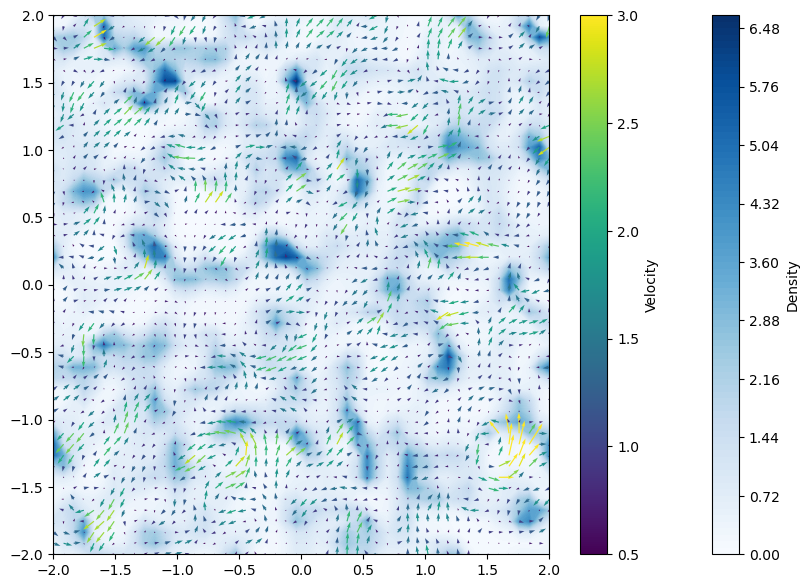

In [42]:
# Figure
plt.figure(figsize=(10,7))

Z1 = plt.contourf(x_2d, y_2d, dens_2d, 100, cmap = "Blues")
Z2 = plt.quiver(x_2d, y_2d, velx_2d, vely_2d, modulus_velocity, cmap = "viridis", clim=(0.5, 3))

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label("Density")
CB2.set_label("Velocity")

plt.show()